In [3]:
import os
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.optimizers import RMSprop

In [4]:
os.environ['CUDA_DEVICE_ORDER']="PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES']="0"

import tensorflow as tf
physical_devices= tf.config.list_physical_devices('GPU')
try: 
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    print('Failed to limit GPU memory')

Failed to limit GPU memory


In [5]:
data_dir = 'D:/DatasetMuseumFix/'

# Image data generator with rescaling
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

# Training dataset
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  
    subset='training' 
)

# Validation dataset
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  
    subset='validation'
)

Found 4188 images belonging to 13 classes.
Found 1794 images belonging to 13 classes.


In [6]:
base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
preds = Dense(13, activation='softmax')(x)  

model = Model(inputs=base_model.input, outputs=preds)


In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                                           

In [8]:
for layers in model.layers[:-5]:
    layers.trainable = False

In [39]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_4[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                                         

In [9]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20
)

Epoch 1/20
131/131 [==============================] - 320s 2s/step - loss: 0.4904 - accuracy: 0.8782 - val_loss: 0.1930 - val_accuracy: 0.9509
Epoch 2/20
131/131 [==============================] - 214s 2s/step - loss: 0.0117 - accuracy: 0.9995 - val_loss: 0.1449 - val_accuracy: 0.9588
Epoch 3/20
131/131 [==============================] - 223s 2s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1398 - val_accuracy: 0.9610
Epoch 4/20
131/131 [==============================] - 211s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1286 - val_accuracy: 0.9632
Epoch 5/20
131/131 [==============================] - 217s 2s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1269 - val_accuracy: 0.9649
Epoch 6/20
131/131 [==============================] - 212s 2s/step - loss: 7.7909e-04 - accuracy: 1.0000 - val_loss: 0.1424 - val_accuracy: 0.9627
Epoch 7/20
131/131 [==============================] - 212s 2s/step - loss: 5.5970e-04 - accuracy: 1.0000 - val_loss: 0.1223 - val_accuracy

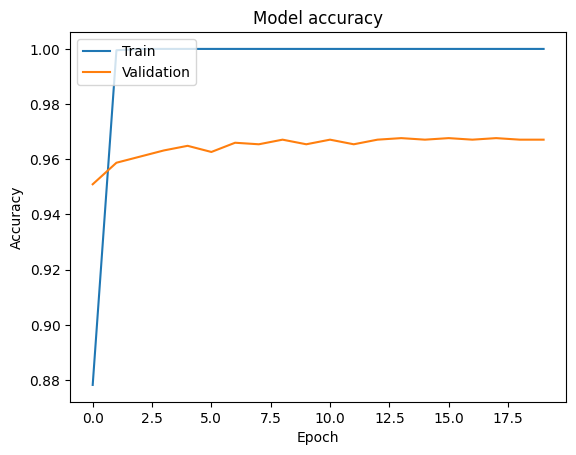

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.ylim([0, 0.1])
plt.show()


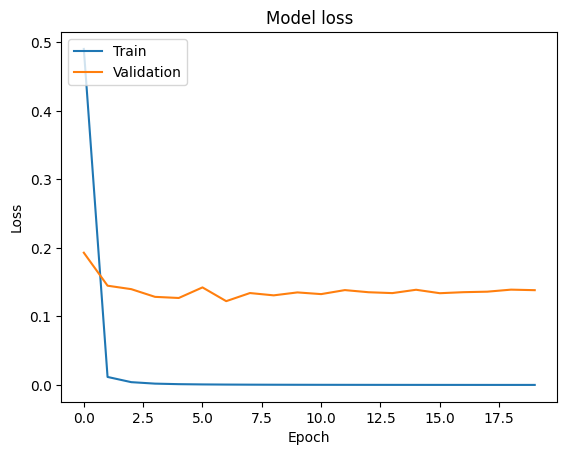

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.ylim([0, 5])
plt.show()

In [26]:
from PIL import Image

folder = 'D:/DatasetMuseum/PaintingIGustiNgurahRai'
dirs = os.listdir(folder)
print(folder)

for item in dirs:
    fullpath = os.path.join(folder, item)
    if os.path.isfile(fullpath):
        img = Image.open(fullpath).convert('RGB')
        img = img.resize((224, 224))
        img_array = np.array(img) / 255.0 
        img_array = np.expand_dims(img_array, axis=0)
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions)
        print("Predicted Class:", predicted_class)

        if predicted_class==1:
            print("Bali Following Independence")
        elif predicted_class==2:
            print("Dang Hyang Nirartha")
        elif predicted_class==3:
            print("Sagung Wah In Preparation To Attack The Dutch")
        elif predicted_class==4:
            print("Spreading The News of The Proclamation of Indonesia")
        elif predicted_class==5:
            print("The Battle of Jagaraga")
        elif predicted_class==6:
            print("The Crowning Of Sri Kresna Kepakisan")
        elif predicted_class==7:
            print("The Establishment Of Indonesian People Struggling Board Of Sunda Kecil")
        elif predicted_class==8:
            print("The Naval Battle In Bali Strait")
        elif predicted_class==9:
            print("The Rise Of Youth Organization")
        elif predicted_class==10:
            print("Painting I Gusti Ngurah Rai")
        elif predicted_class==11:
            print("Painting Menyambut Proklamasi Kemerdekaan RI")
        elif predicted_class==12:
            print("Painting Ngurah Rai Mengatur Siasat Tempur")
        else:
            print("RandomData")

D:/DatasetMuseum/PaintingIGustiNgurahRai
1/1 [==============================] - 0s 194ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 208ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 114ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 101ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 108ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 174ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 101ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 104ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 92ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 133ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 89ms/step
Predicted Class: 0
RandomData
1/1 [==============================] - 0s 176ms/

In [62]:
from tensorflow.keras.models import load_model
import pathlib

model.save('model_fix.h5')
loaded_model = load_model('model_fix.h5')


export_dir = 'C:/Users/user/miniconda3/CapstoneProject'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('C:/Users/user/miniconda3/CapstoneProject/model_fix.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: C:/Users/user/miniconda3/CapstoneProject\assets


INFO:tensorflow:Assets written to: C:/Users/user/miniconda3/CapstoneProject\assets


12146656